# Importing Libraries

In [61]:
import pandas as pd
from bokeh.plotting import figure
from bokeh.charts import Bar, output_notebook, show,output_file
from bokeh.models import CategoricalColorMapper,HoverTool,ColumnDataSource
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading data & Grouping by toxicity

In [3]:
df = pd.read_csv('mergedDataSet.csv',usecols=['comment_text','merged_rating'])
df_gby = df.groupby('merged_rating').count().reset_index()
df_gby

,merged_rating,comment_text
0,0,144161
1,1,7762
2,2,8691


# Converting Dataframe to Bokeh DataSource

In [5]:
source = ColumnDataSource(df_gby)

# Preparing Bokeh Plot

In [108]:
p= figure(x_axis_label = 'Merged_Rating',y_axis_label ='Count',title='Toxic Class Distribution',background_fill_color ='black')

p.vbar(x='merged_rating',top='comment_text',width = 0.5,source=source,color=['blue','brown','orange']\
       ,hover_fill_color='firebrick',hover_alpha=0.5,hover_line_color='black',legend='merged_rating')

hover = HoverTool(tooltips=[('Count', '@comment_text')])
p.add_tools(hover)

# Output

In [109]:
output_notebook()
show(p)

Loading BokehJS ...

# Wordcloud function

In [101]:
stopwords = list(STOPWORDS)
def wordcloud(text):
    wordcloud = WordCloud(stopwords=stopwords,background_color='black',width=2000,height=1800\
                        ,max_words =100 ).generate(text)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# Wordcloud for Toxicity Level 0 (Low)

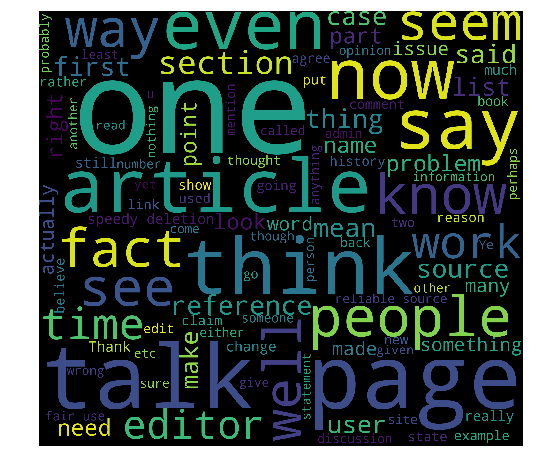

In [102]:
comments_0 =df[df['merged_rating']==0]
comments_0 = comments_0['comment_text'].values
text_0 = " ".join([c for c in comments_0])
wordcloud(text_0)

# Wordcloud for Toxicity Level 1 (Medium)

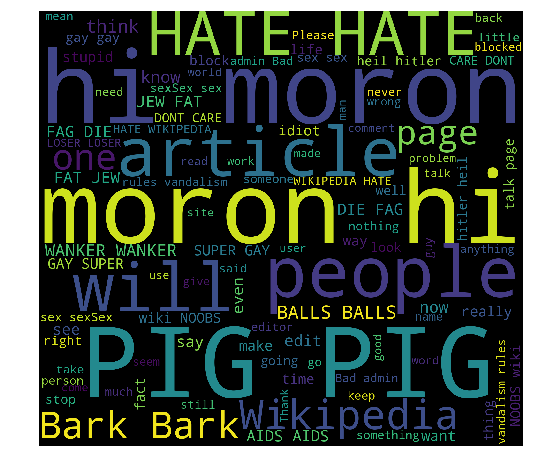

In [103]:
comments_1 =df[df['merged_rating']==1]
comments_1 = comments_1['comment_text'].values
text_1 = " ".join([c for c in comments_1])
wordcloud(text_1)

# Wordcloud for Toxicity Level 2 (High)

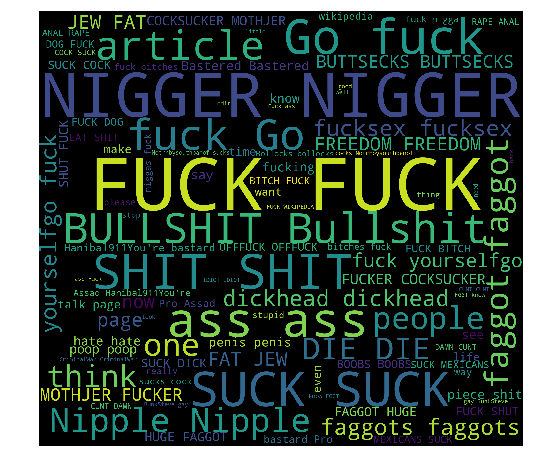

In [105]:
comments_2 =df[df['merged_rating']==2]
comments_2 = comments_2['comment_text'].values
text_2 = " ".join([c for c in comments_2])
wordcloud(text_2)